Finding Roots
=============

Root finding is hard!

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

import numpy
import scipy
import matplotlib
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12,12))
plt.rc('figure', dpi=320)
plt.rc('font', size=16)
plt.rc('font', weight=800)
plt.rc('lines', linewidth=3)
plt.rc('axes', grid=True)
plt.rc('axes', labelweight=800)

imagesdir = '/Users/cswiercz/talks/narc-smale/images/'
#print plt.rcParams

# The Chaos that is Newton

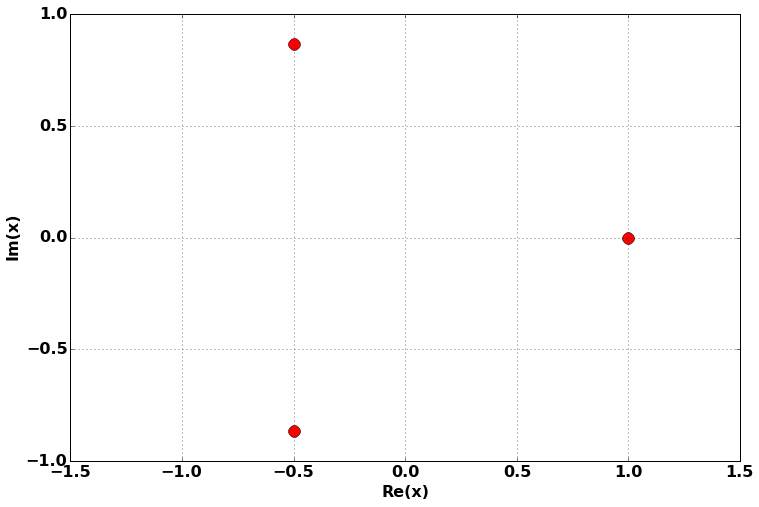

In [3]:
re = 1.49
im = 1
roots = numpy.array([exp(2j*pi*k/3.) for k in range(3)])
for root in roots:
    plot(root.real,root.imag,'ro',markersize=12)
    
plot(-re,-im,'w.')
plot(-re,im,'w.')
plot(re,-im,'w.')
plot(re,im,'w.')
    
xlabel('Re(x)')
ylabel('Im(x)')
    
axis([-re,re,-im,im])
axis('scaled')

savefig(imagesdir + 'newton_roots.png',bbox_inches='tight')

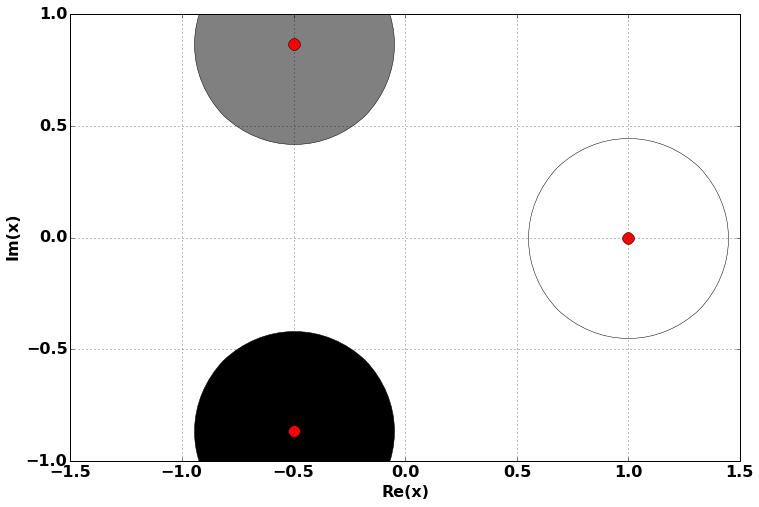

In [4]:
re = 1.49
im = 1

plt.clf()

roots = numpy.array([exp(2j*pi*k/3.) for k in range(3)])

plot(roots[0].real,roots[0].imag,'wo',markersize=200)
plot(roots[1].real,roots[1].imag,marker='o',color='gray',markersize=200)
plot(roots[2].real,roots[2].imag,'ko',markersize=200)
for root in roots:
    plot(root.real,root.imag,'ro',markersize=12)
    
plot(-re,-im,'w.')
plot(-re,im,'w.')
plot(re,-im,'w.')
plot(re,im,'w.')
   
xlabel('Re(x)')
ylabel('Im(x)')
    
axis([-re,re,-im,im])
axis('scaled')

savefig(imagesdir + 'newton_roots_circles.pdf',bbox_inches='tight')

In [5]:
f = lambda x: x**3. - 1.
df = lambda x: 3.*x**2.
df2 = lambda x: 6.*x
df3 = lambda x: 6.

def newton(x0):
    df_x0 = df(x0)
    if df_x0 != 0:
        return x0 - f(x0)/df_x0
    else:
        return x0

def newton_iter(z):
    fz = f(z)
    while abs(fz) > 1e-12:
        z = newton(z)
        fz = f(z)
    return z
newton_iter = vectorize(newton_iter)


In [6]:
re = 1.49
im = 1
X,Y = mgrid[-re:re:1024j,-im:im:1024j]
Z = X + 1.j*Y

U = newton_iter(Z)

roots = numpy.array([exp(2j*pi*k/3.) for k in range(3)])
def closest_root_index(z):
    return argmin(abs(roots-z))
closest_root_index = vectorize(closest_root_index)

V = closest_root_index(U)

/Users/cswiercz/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


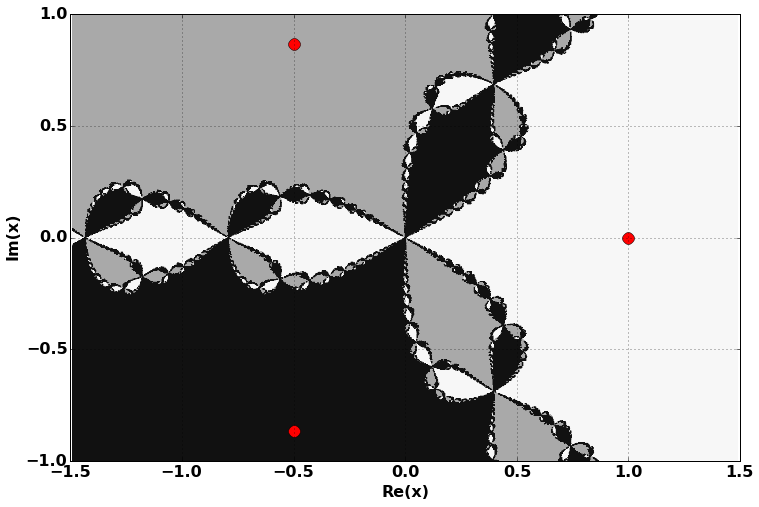

In [7]:
clf()
hold(True)
contourf(X,Y,V,cmap=matplotlib.cm.Greys)

for root in roots:
    plot(root.real,root.imag,'ro',markersize=12)
    
xlabel('Re(x)')
ylabel('Im(x)')
    
axis([-re,re,-im,im])
axis('scaled')
savefig(imagesdir + 'newton.png',bbox_inches='tight')

In [8]:
def quadratic_boundary(z,root):
    return (0.5)**7 * numpy.abs(z-root) - numpy.abs(newton(newton(newton(z))) - root)
quadbdry = numpy.vectorize(quadratic_boundary, excluded=['root'])

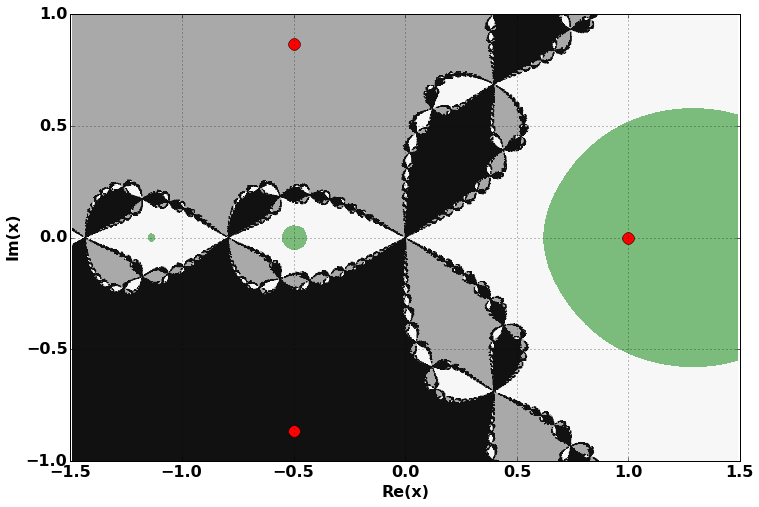

In [9]:
clf()
hold(True)
contourf(X,Y,V,cmap=matplotlib.cm.Greys)

for root in roots:
    plot(root.real,root.imag,'ro',markersize=12)
    
X1,Y1 = mgrid[-re:re:128j,-im:im:128j]
W = X1 + 1.j*Y1

aroot = 1
contourf(X1, Y1, quadbdry(W,aroot), [0,100], colors=['green'], alpha=0.5)


xlabel('Re(x)')
ylabel('Im(x)')
    
axis([-re,re,-im,im])
axis('scaled')
savefig(imagesdir + 'quadratic.png',bbox_inches='tight')



In [10]:
dfs = [df2, df3]

def factorial(k):
    val = 1
    for n in range(1,k+1):
        val *= n
    return val


def beta_prim(x):
    return numpy.abs(f(x)/df(x))
beta = numpy.vectorize(beta_prim)


def gamma_prim(x):
    dfinv = 1./df(x)
    vals = numpy.array([dfinv*dfs[k](x)/factorial(k+2) for k in range(2)])
    norms = numpy.abs(vals)**(1./(k+1.))
    return max(norms)
gamma = numpy.vectorize(gamma_prim)


def alpha_prim(x):
    return beta(x)*gamma(x)
alpha = numpy.vectorize(alpha_prim)

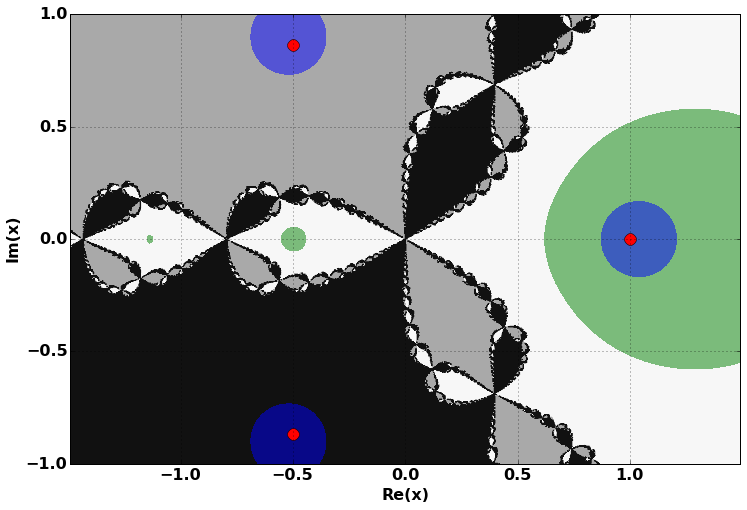

In [11]:
clf()
hold(True)
contourf(X,Y,V,cmap=matplotlib.cm.Greys)
for root in roots:
    plot(root.real,root.imag,'ro',markersize=12)

X1,Y1 = mgrid[-re:re:128j,-im:im:128j]
W = X1 + 1.j*Y1

aroot = 1
contourf(X1, Y1, quadbdry(W,aroot), [0,100], colors=['green'], alpha=0.5)

contourf(X1, Y1, alpha(W), [0,0.157671], colors=['blue'], alpha=0.5)

xlabel('Re(x)')
ylabel('Im(x)')
    
axis('scaled')
axis([-re,re,-im,im])
#axis([0,re,-0.5*im,0.5*im])

savefig(imagesdir + 'alpha.png',bbox_inches='tight')




In [12]:
f = lambda x: x**9 - 1
df = lambda x: 9*x**8

roots = numpy.array([exp(2j*pi*k/9.) for k in range(9)])

def newton(x0):
    df_x0 = df(x0)
    if df_x0 != 0:
        return x0 - f(x0)/df_x0
    else:
        return x0

def newton_iter(z):
    fz = f(z)
    while abs(fz) > 1e-14:
        z = newton(z)
        fz = f(z)
    return z
newton_iter = vectorize(newton_iter)


re = 1.49
im = 1.00
X,Y = mgrid[-re:re:1024j,-im:im:1024j]
Z = X + 1.j*Y

U = newton_iter(Z)

def closest_root_index(z):
    return argmin(abs(roots-z))
closest_root_index = vectorize(closest_root_index)

V = closest_root_index(U)

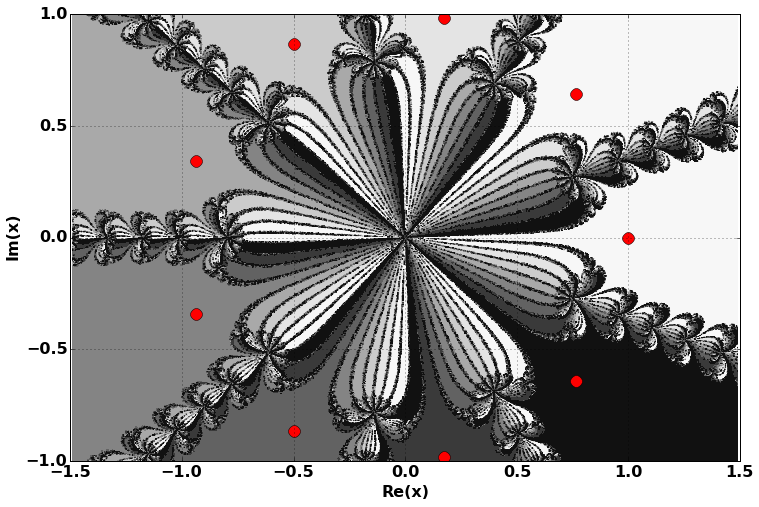

In [13]:
clf()
hold(True)
contourf(X,Y,V,cmap=matplotlib.cm.Greys)

for root in roots:
    plot(root.real,root.imag,'ro',markersize=12)
    
xlabel('Re(x)')
ylabel('Im(x)')
    
axis([-re,re,-im,im])
axis('scaled')
savefig(imagesdir + 'newtonalt.png',bbox_inches='tight')

Analytic Continuation
=====================

In [14]:
def factorial(k):
    return product(range(1,k+1))

def newton(dfs,xip1,y,epsilon):
    f = dfs[0]
    df = dfs[1]
    while abs(f(xip1,y)) > epsilon:
        if df(xip1,y) == 0:
            return y
        y = y - f(xip1, y) / df(xip1, y)
    return y

def beta(dfs,xip1,y):
    return numpy.abs(dfs[0](xip1,y)/dfs[1](xip1,y))

def gamma(dfs,xip1,y):
    dfinv = 1./dfs[1](xip1,y)
    vals = numpy.array([dfinv*dfs[k](xip1,y)/factorial(k+2) for k in range(2)])
    norms = numpy.abs(vals)**(1./(k+1.))
    return max(norms)

def alpha(dfs,xip1,y):
    return beta(dfs,xip1,y)*gamma(dfs,xip1,y)

ALPHA_CONSTANT = 0.1576

In [15]:

"""
f = lambda x,y: y**3 - 2*x**3*y + x**7
dfy = lambda x,y: 3*y**2 - 2*x**3
df2y = lambda x,y: 6*y
df3y = lambda x,y: 6
fcoeffs = lambda x: [1,0,-2*x**3,x**7]
"""


f = lambda x,y: y**3 - x
dfy = lambda x,y: 3*y**2
df2y = lambda x,y: 6*y
df3y = lambda x,y: 6
fcoeffs = lambda x: [1,0,0,-x]


"""
f = lambda x,y: y**3 + y**2 + (x-1)**2*y - 4.j*x
dfy = lambda x,y: 3*y**2 + 2*y + (x-1)**2
df2y = lambda x,y: 6*y + 2
df3y = lambda x,y: 6
fcoeffs = lambda x: [1,1,(x-1)**2,-(x-1)**5]
"""

dfs = [f, dfy, df2y, df3y]



In [16]:
#x = linspace(0,1,128)
N = 32
t = linspace(0,1,N)
x = exp(2.j*pi*t) - 2
#t = linspace(0,1,N)
#x = 1 + 7*t

vals = numpy.zeros((3,N), dtype=numpy.complex)
y0 = scipy.roots(fcoeffs(x[0]))
vals[:,0] = numpy.array(y0).T

yi = y0
for i in range(N-1):
    xip1 = x[i+1]
    yi = numpy.array([newton(dfs, xip1, yij, 1e-4) for yij in yi], dtype=numpy.complex)
    vals[:,(i+1)] = yi.T


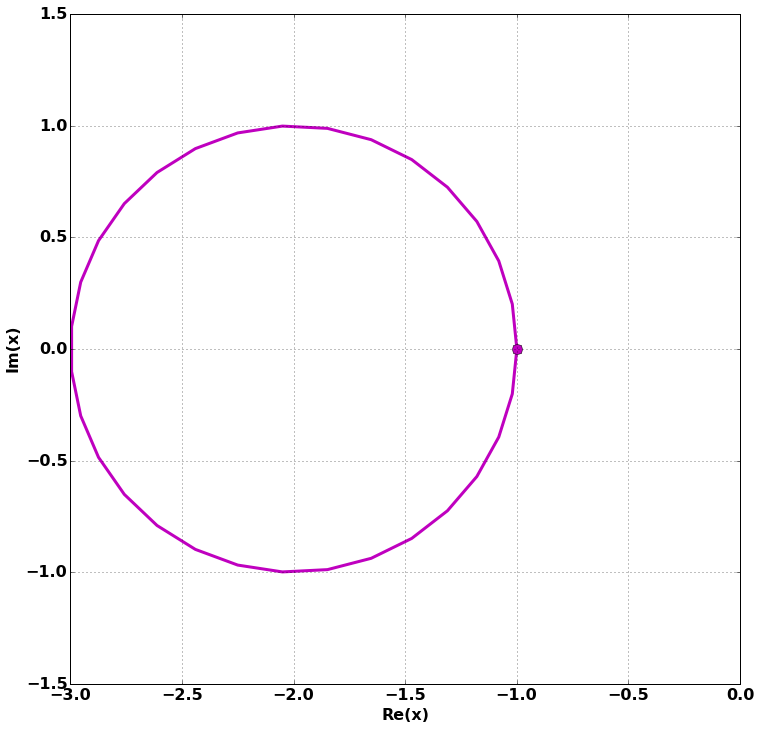

In [17]:
plot(x.real, x.imag, 'm')
plot(x[0].real, x[0].imag, 'mo', markersize=10)

grid(True)
xlabel('Re(x)')
ylabel('Im(x)')
axis([-3,0,-1.5,1.5])
#axis('scaled')
figsize(12,12)

savefig(imagesdir + 'ancontsimplex1.png',bbox_inches='tight')

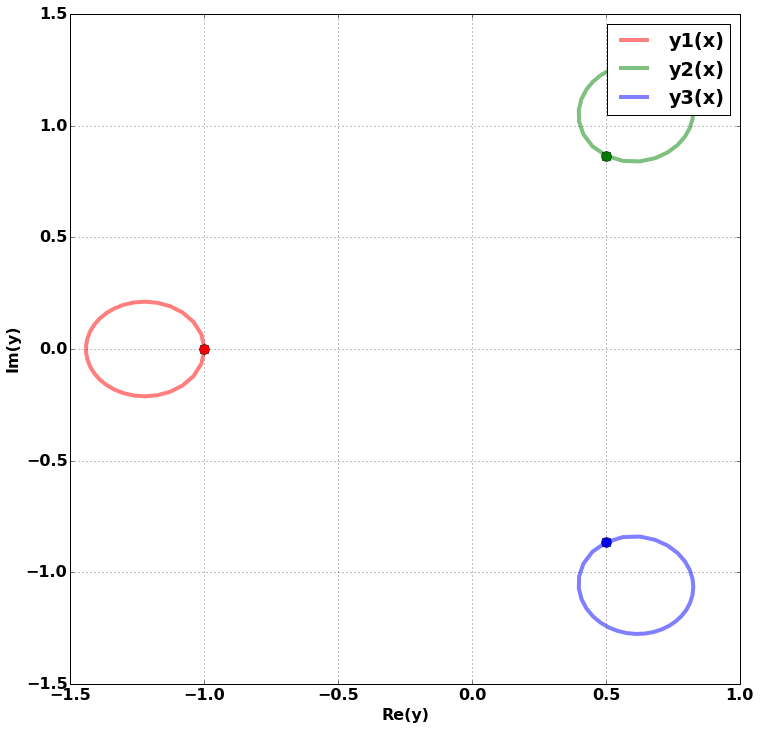

In [18]:
clf()
colors = ['r','g', 'b']
labels = ['y1(x)', 'y2(x)', 'y3(x)']
for i in range(3):
    y = vals[i]

    color = colors[i]
#    plot(t, y.real, color+'-', alpha=0.8, linewidth=4)
#    plot(t, y.imag, color+'--', alpha=0.2, linewidth=4)
    plot(y.real, y.imag, color, alpha=0.5, linewidth=4, label=labels[i])
    plot(y[0].real, y[0].imag, color+'o', markersize=10)

grid(True)
xlabel('Re(y)')
ylabel('Im(y)')
legend(loc='upper right')

savefig(imagesdir + 'ancontsimple1.png',bbox_inches='tight')

A More Complicated Example
==========================

In [19]:
f = lambda x,y: y**3 - 2*x**3*y + x**7
dfy = lambda x,y: 3*y**2 - 2*x**3
df2y = lambda x,y: 6*y
df3y = lambda x,y: 6
fcoeffs = lambda x: [1,0,-2*x**3,x**7]
dfs = [f, dfy, df2y, df3y]

In [20]:
N = 64
t = linspace(0,1,N)
x = (1)*exp(2.j*pi*t) - 2

vals = numpy.zeros((3,N), dtype=numpy.complex)
y0 = scipy.roots(fcoeffs(x[0]))
vals[:,0] = numpy.array(y0).T

yi = y0
for i in range(N-1):
    xip1 = x[i+1]
    yi = numpy.array([newton(dfs, xip1, yij, 1e-4) for yij in yi], dtype=numpy.complex)
    vals[:,(i+1)] = yi.T

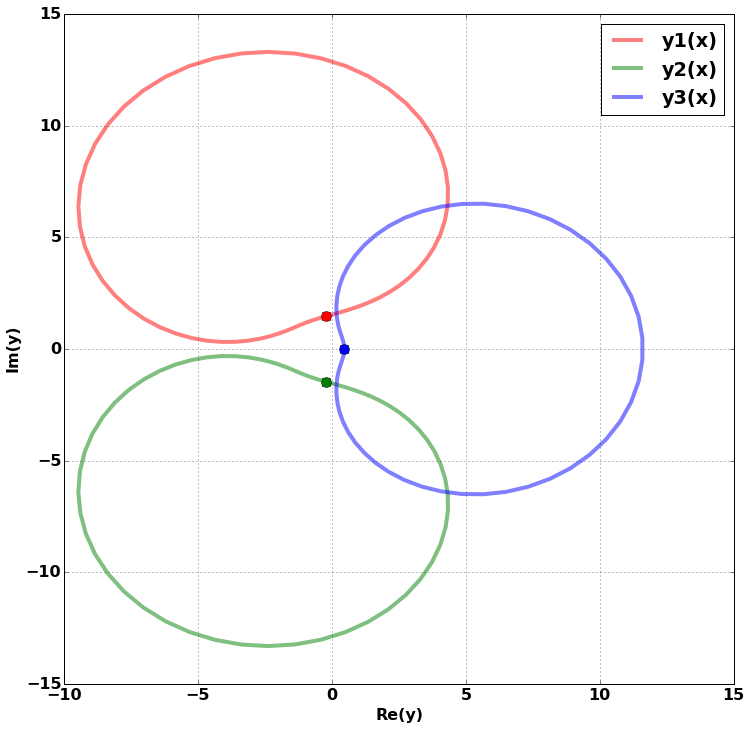

In [21]:
clf()
colors = ['r','g', 'b']
labels = ['y1(x)', 'y2(x)', 'y3(x)']
for i in range(3):
    y = vals[i]

    color = colors[i]
#    plot(t, y.real, color+'-', alpha=0.8, linewidth=4)
#    plot(t, y.imag, color+'--', alpha=0.2, linewidth=4)
    plot(y.real, y.imag, color, alpha=0.5, linewidth=4, label=labels[i])
    plot(y[0].real, y[0].imag, color+'o', markersize=10)

grid(True)
xlabel('Re(y)')
ylabel('Im(y)')
legend()
axis([-10,15,-15,15])

savefig(imagesdir + 'ancontcomplicated64.png', bbox_inches='tight')

In [22]:
def analytically_continue(dfs, xi, xip1, yi):
    r"""Analytically continues the roots in yi above xi to xip1"""
    
    # (1) check that each yij in yi is an approximate solution
    #     to f(xip1, y) = 0
    #
    # If not, halve your step size and repeat
    for yij in yi:
        if alpha(dfs,xip1,yij) > ALPHA_CONSTANT:
            xiphalf = 0.5*(xi + xip1)
            yiphalf = analytically_continue(dfs, xi, xiphalf, yi)
            yip1 = analytically_continue(dfs, xiphalf, xip1, yiphalf)
            return yip1
        
    # now we know that each yij is an approximate solution
        
    # (2) determine if each approximate solution will converge to
    #     ***distinct*** associated solutions by checking if
    #
    #    |yij - yik| < 2( beta(f,yij) + beta(f,yik))
    #
    #    for every pair of roots yij, yik
    degree = len(dfs)-1
    for j in range(degree):
        yij = yi[j]
        betaij = beta(dfs, xip1, yij)
        
        for k in range(j+1,degree):
            yik = yi[k]
            betaik = beta(dfs, xip1, yik)
            
            if abs(yij - yik) < 2*(betaij + betaik):
                # the associated solutions do not lead to distinct roots
                # refine the step and try again
                xiphalf = 0.5*(xi + xip1)
                yiphalf = analytically_continue(dfs, xi, xiphalf, yi)
                yip1 = analytically_continue(dfs, xiphalf, xip1, yiphalf)
                return yip1
            
    # at this point, each yij is known to converge quadratically to distinct roots
    
    # (3) newton iterate each root
    yip1 = [newton(dfs,xip1,yij,1e-8) for yij in yi]
    return yip1

In [23]:
N = 16
t = linspace(0,1,N)
x = (1)*exp(2.j*pi*t) - 2

vals = numpy.zeros((3,N), dtype=numpy.complex)
vals[:,0] = numpy.array(y0).T

xi = x[0]
yi = y0
for i in range(N-1):
#    print 'continuting to x =', x[i+1]
    xip1 = x[i+1]
    yip1 = analytically_continue(dfs, xi, xip1, yi)
    vals[:,(i+1)] = numpy.array(yip1).T
    
    # update
    xi = xip1
    yi = yip1


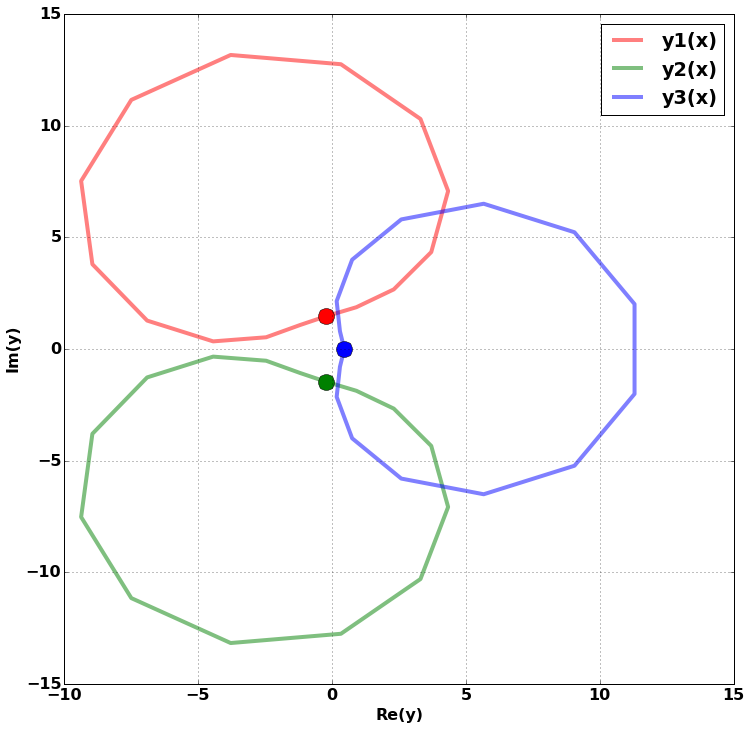

In [24]:
clf()
colors = ['r','g', 'b']
for i in range(3):
    y = vals[i]

    color = colors[i]
#    plot(t, y.real, color, alpha=0.8, linewidth=4)
#    plot(t, y.imag, color+'--', alpha=0.2, linewidth=4)
    plot(y.real, y.imag, color, alpha=0.5, linewidth=4, label=labels[i])
    plot(y[0].real, y[0].imag, color+'o', markersize=16)

grid(True)
xlabel('Re(y)')
ylabel('Im(y)')
legend()
savefig(imagesdir + 'ancontsmale.png',bbox_inches='tight')

# A More Complicated Example - Branch Point

In [25]:
import sympy
from sympy.abc import x,y

f = y**3 - 2*x**3*y + x**7
df = f.diff(y)
res = sympy.resultant(f,df,y).as_poly(x)
rts = res.all_roots()

map(numpy.complex, rts)

[0j,
 0j,
 0j,
 0j,
 0j,
 0j,
 0j,
 0j,
 0j,
 (1.0345637159435732+0j),
 (-0.8369796279620464-0.6081012947885316j),
 (-0.8369796279620464+0.6081012947885316j),
 (0.31969776999025984-0.9839285635706635j),
 (0.31969776999025984+0.9839285635706635j)]

In [26]:
f = lambda x,y: y**3 - 2*x**3*y + x**7
dfy = lambda x,y: 3*y**2 - 2*x**3
df2y = lambda x,y: 6*y
df3y = lambda x,y: 6
fcoeffs = lambda x: [1,0,-2*x**3,x**7]
dfs = [f, dfy, df2y, df3y]

N = 32
t = linspace(0,1,N)
x = (0.5)*exp(2.j*pi*t) + (-0.8369796279620464-0.6081012947885316j)
y0 = scipy.roots(fcoeffs(x[0]))

vals = numpy.zeros((3,N), dtype=numpy.complex)
vals[:,0] = numpy.array(y0).T

xi = x[0]
yi = y0
for i in range(N-1):
#    print 'continuting to x =', x[i+1]
    xip1 = x[i+1]
    yip1 = analytically_continue(dfs, xi, xip1, yi)
    vals[:,(i+1)] = numpy.array(yip1).T
    
    # update
    xi = xip1
    yi = yip1



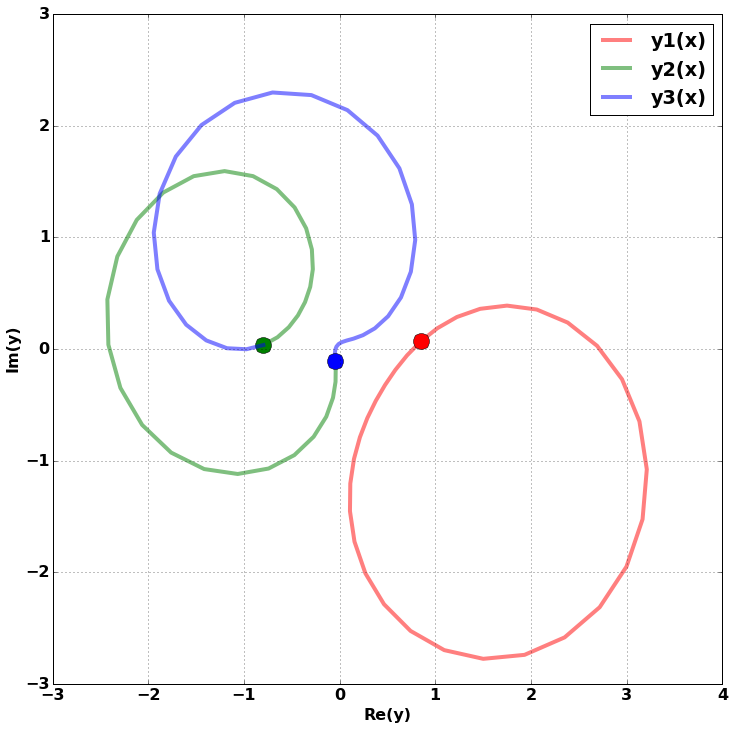

In [27]:
clf()
colors = ['r','g', 'b']
for i in range(3):
    y = vals[i]

    color = colors[i]
#    plot(t, y.real, color, alpha=0.8, linewidth=4)
#    plot(t, y.imag, color+'--', alpha=0.2, linewidth=4)
    plot(y.real, y.imag, color, alpha=0.5, linewidth=4, label=labels[i])
    plot(y[0].real, y[0].imag, color+'o', markersize=16)

grid(True)
xlabel('Re(y)')
ylabel('Im(y)')
legend()
savefig(imagesdir + 'ancontsmalebranch.png',bbox_inches='tight')